+ Tugas analisis perjalanan Uber ini di awali dengan mengimpor pustaka Python yang diperlukan dan kumpulan data:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import dataset and preview

data = pd.read_csv("dataset/Uber/uber-raw-data-sep14.csv")
data["Date/Time"] = data["Date/Time"].map(pd.to_datetime) 
data.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


+ Data ini berisi data tentang tanggal dan waktu, lintang dan bujur, dan kolom Dasar yang berisi kode yang berafiliasi dengan penjemputan uber

In [3]:
# Saat ini, mari siapkan data yang saya gunakan di sini untuk menganalisis perjalanan Uber menurut hari dan jam:

data["Day"] = data["Date/Time"].apply(lambda x: x.day)
data["Weekday"] = data["Date/Time"].apply(lambda x: x.weekday())
data["Hour"] = data["Date/Time"].apply(lambda x: x.hour)
print(data.head())

            Date/Time      Lat      Lon    Base  Day  Weekday  Hour
0 2014-09-01 00:01:00  40.2201 -74.0021  B02512    1        0     0
1 2014-09-01 00:01:00  40.7500 -74.0027  B02512    1        0     0
2 2014-09-01 00:03:00  40.7559 -73.9864  B02512    1        0     0
3 2014-09-01 00:06:00  40.7450 -73.9889  B02512    1        0     0
4 2014-09-01 00:11:00  40.8145 -73.9444  B02512    1        0     0


In [4]:
# Setting ukuran grafik yang akan di tampilkan
import matplotlib.pyplot as plt  # Untuk menampikan grafik 
plt.rcParams["figure.figsize"] = (20,6)  

<AxesSubplot:xlabel='Day'>

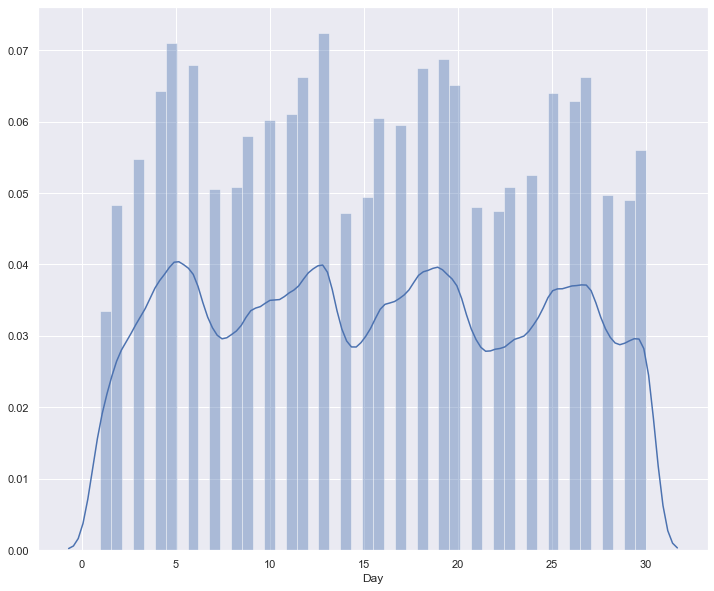

In [5]:
# mari kita lihat setiap hari untuk melihat pada hari mana perjalanan Uber tertinggi:

sns.set(rc={'figure.figsize':(12, 10)})
sns.distplot(data["Day"])

+ Kita dapat mengatakan bahwa perjalanan Uber meningkat pada hari kerja dan menurun pada akhir pekan.

<AxesSubplot:xlabel='Hour'>

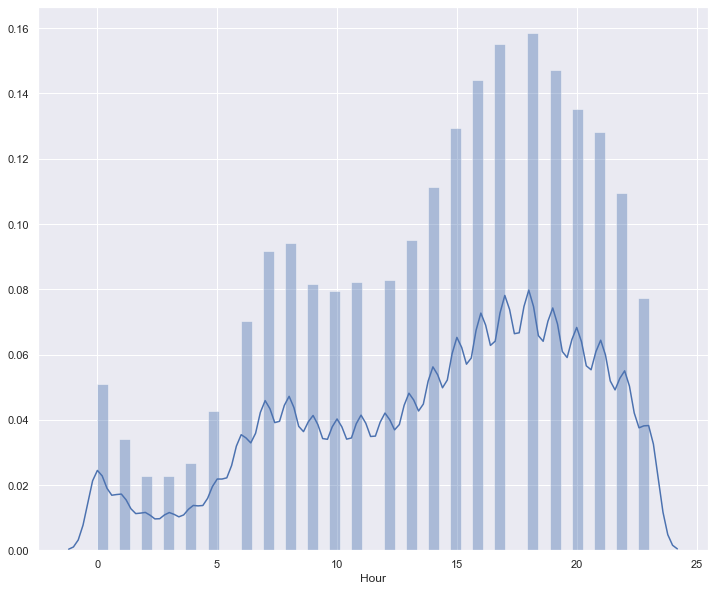

In [6]:
# Sekarang mari kita analisis perjalanan Uber menurut jam:
sns.distplot(data["Hour"])

+ Perjalanan Uber berkurang setelah tengah malam dan kemudian mulai meningkat setelah jam 5 pagi dan perjalanan terus meningkat hingga jam 6 sore sehingga jam 6 sore adalah jam tersibuk Uber kemudian perjalanan mulai berkurang.

<AxesSubplot:xlabel='Weekday'>

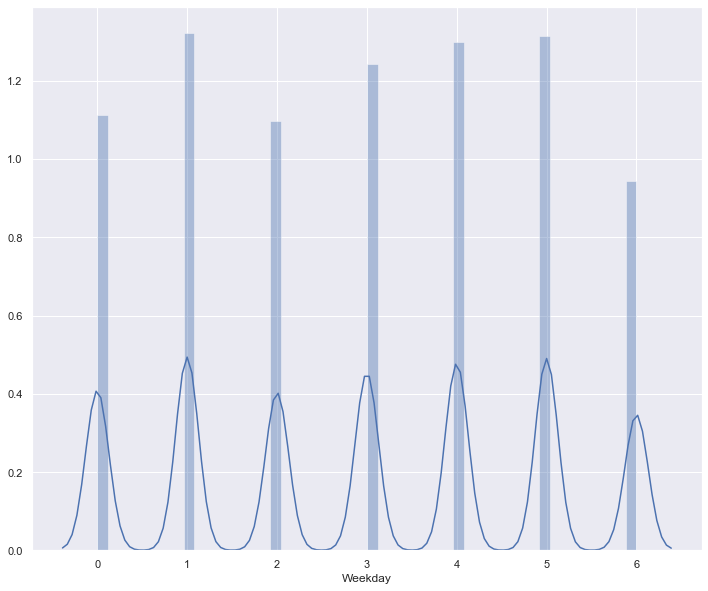

In [7]:
# mari kita analisis perjalanan Uber menurut hari kerja:
sns.distplot(data["Weekday"])

+ Pada gambar di atas 0 menunjukkan hari Minggu, pada hari Minggu perjalanan Uber dan lebih dari hari Sabtu sehingga dapat dikatakan orang juga menggunakan Uber untuk jalan-jalan daripada hanya untuk pergi bekerja. 
+ Pada hari Sabtu, perjalanan Uber adalah yang terendah dan pada hari Senin, merupakan yang tertinggi.

<AxesSubplot:xlabel='Hour', ylabel='Weekday'>

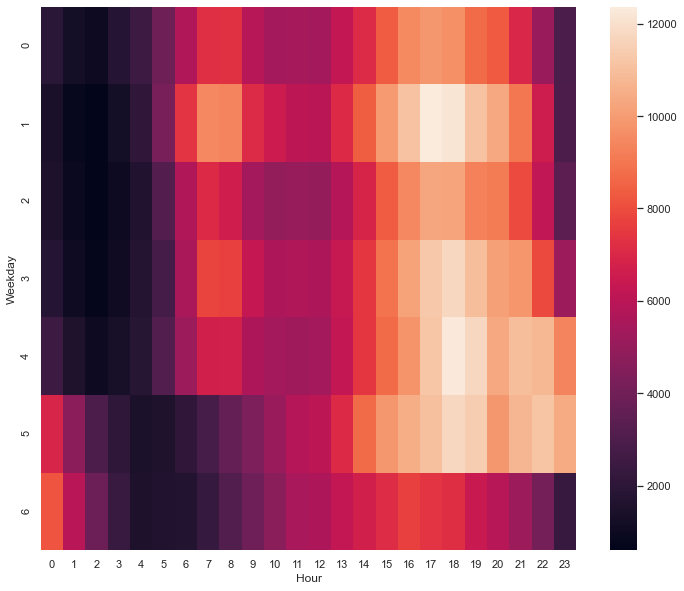

In [8]:
# Mari kita lihat korelasi jam dan hari kerja pada perjalanan Uber:

df = data.groupby(["Weekday", "Hour"]).apply(lambda x: len(x))
df = df.unstack()
sns.heatmap(df, annot=False)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


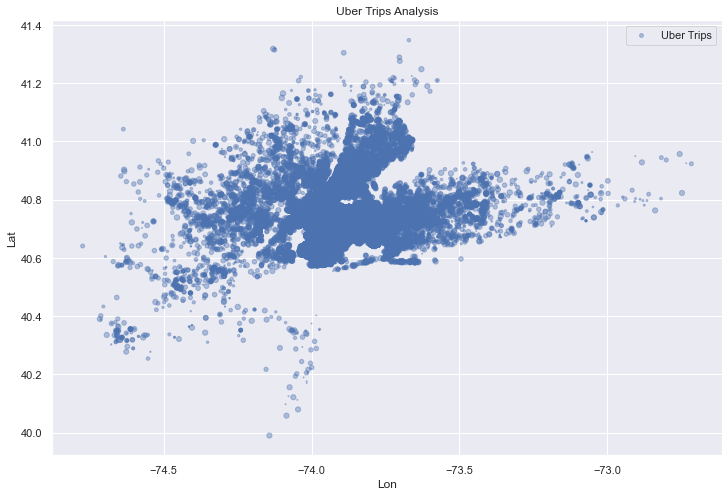

In [10]:
# Kami juga dapat memplot kepadatan perjalanan Uber menurut wilayah di kota Baru Anda:
data.plot(kind='scatter', x='Lon', y='Lat', alpha=0.4, s=data['Day'], label='Uber Trips',
figsize=(12, 8), cmap=plt.get_cmap('jet'))
plt.title("Uber Trips Analysis")
plt.legend()
plt.show()

# Kesimpulan yg di dapat:

+ Senin adalah hari paling menguntungkan bagi Uber
+ Pada hari Sabtu lebih sedikit orang yang menggunakan Uber
+ Jam 6 sore adalah hari tersibuk bagi Uber
+ Rata-rata kenaikan perjalanan Uber dimulai sekitar jam 5 pagi.
+ Sebagian besar perjalanan Uber berasal dari wilayah Manhattan di New York